# XID+MIPS_SPIRE_SED_Analysis
This notebook takes the posterior of the XID+Herschel_SED run and examines outputs with some useful visualisation

In [1]:
from astropy.io import ascii, fits
import pylab as plt
%matplotlib inline
from astropy import wcs


import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import pandas as pd
import seaborn as sns

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
# load up run
priors,posterior=xidplus.load(filename='./XID+MIPS_SPIRE_SED_ESB_6_750iter_flag_gaia_wdiv_adaptdelta96_uniform_flux.pkl')

In [3]:
from astropy.table import Table, hstack

scat250=Table.read('../WP5-Lockman-SWIRE-SCAT250-v1.0.fits.gz')
scat350=Table.read('../WP5-Lockman-SWIRE-SCAT350-v1.0.fits.gz')
scat500=Table.read('../WP5-Lockman-SWIRE-SCAT500-v1.0.fits.gz')


## Plot maps
1. The actual maps
2. The posterior sample maps
3. The Bayesian P value map

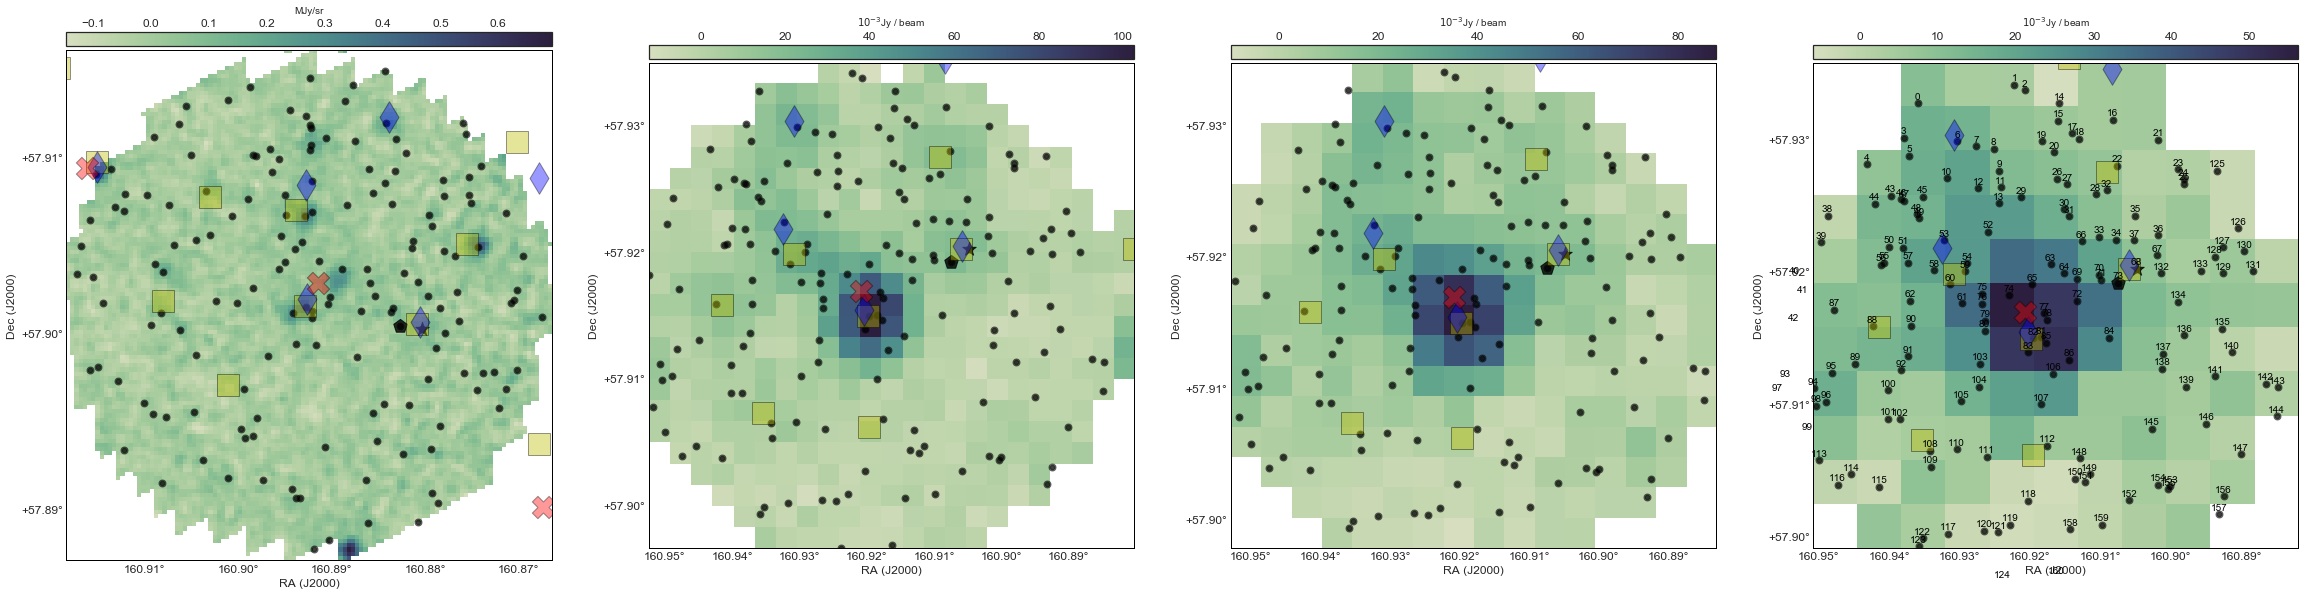

In [4]:
from xidplus import plots
orig_map=plots.plot_map(priors);

for i in range(0,priors[0].nsrc):#[ 2, 35, 51, 86, 90]:
    orig_map[0][3].add_label(priors[0].sra[i], priors[0].sdec[i]+0.0005, np.arange(0,priors[0].nsrc)[i], relative=False)

orig_map[0][0].colorbar.set_axis_label_text(priors[0].imhdu['BUNIT'])
orig_map[0][1].colorbar.set_axis_label_text('$10^{-3}$'+priors[1].imhdu['BUNIT'])
orig_map[0][2].colorbar.set_axis_label_text('$10^{-3}$'+priors[2].imhdu['BUNIT'])
orig_map[0][3].colorbar.set_axis_label_text('$10^{-3}$'+priors[3].imhdu['BUNIT'])


for i in range(0,4):
    orig_map[0][i].show_markers(priors[0].sra, priors[0].sdec, edgecolor='black', facecolor='black',
                marker='o', s=50, alpha=0.5)
    orig_map[0][i].show_markers(priors[0].sra[68], priors[0].sdec[68], edgecolor='black', facecolor='black',
                marker='*', s=200, alpha=0.8)
    orig_map[0][i].show_markers(priors[0].sra[73], priors[0].sdec[73], edgecolor='black', facecolor='black',
                marker='p', s=200, alpha=0.8)
    orig_map[0][i].set_tick_labels_font(size='large')
    orig_map[0][i].axis_labels.set_font(size='large')
    orig_map[0][i].colorbar.set_font(size='large')
    
    orig_map[0][i].show_markers(scat250['RA'],scat250['Dec'], edgecolor='k', facecolor='y',
                                marker='s', s=500, alpha=0.4)
    orig_map[0][i].show_markers(scat350['RA'],scat350['Dec'], edgecolor='k', facecolor='b',
                                marker='d', s=500, alpha=0.4)
    orig_map[0][i].show_markers(scat500['RA'],scat500['Dec'], edgecolor='k', facecolor='r',
                                marker='X', s=500, alpha=0.4)

In [5]:
movie=plots.replicated_map_movie(priors,posterior, 20)

In [6]:
movie

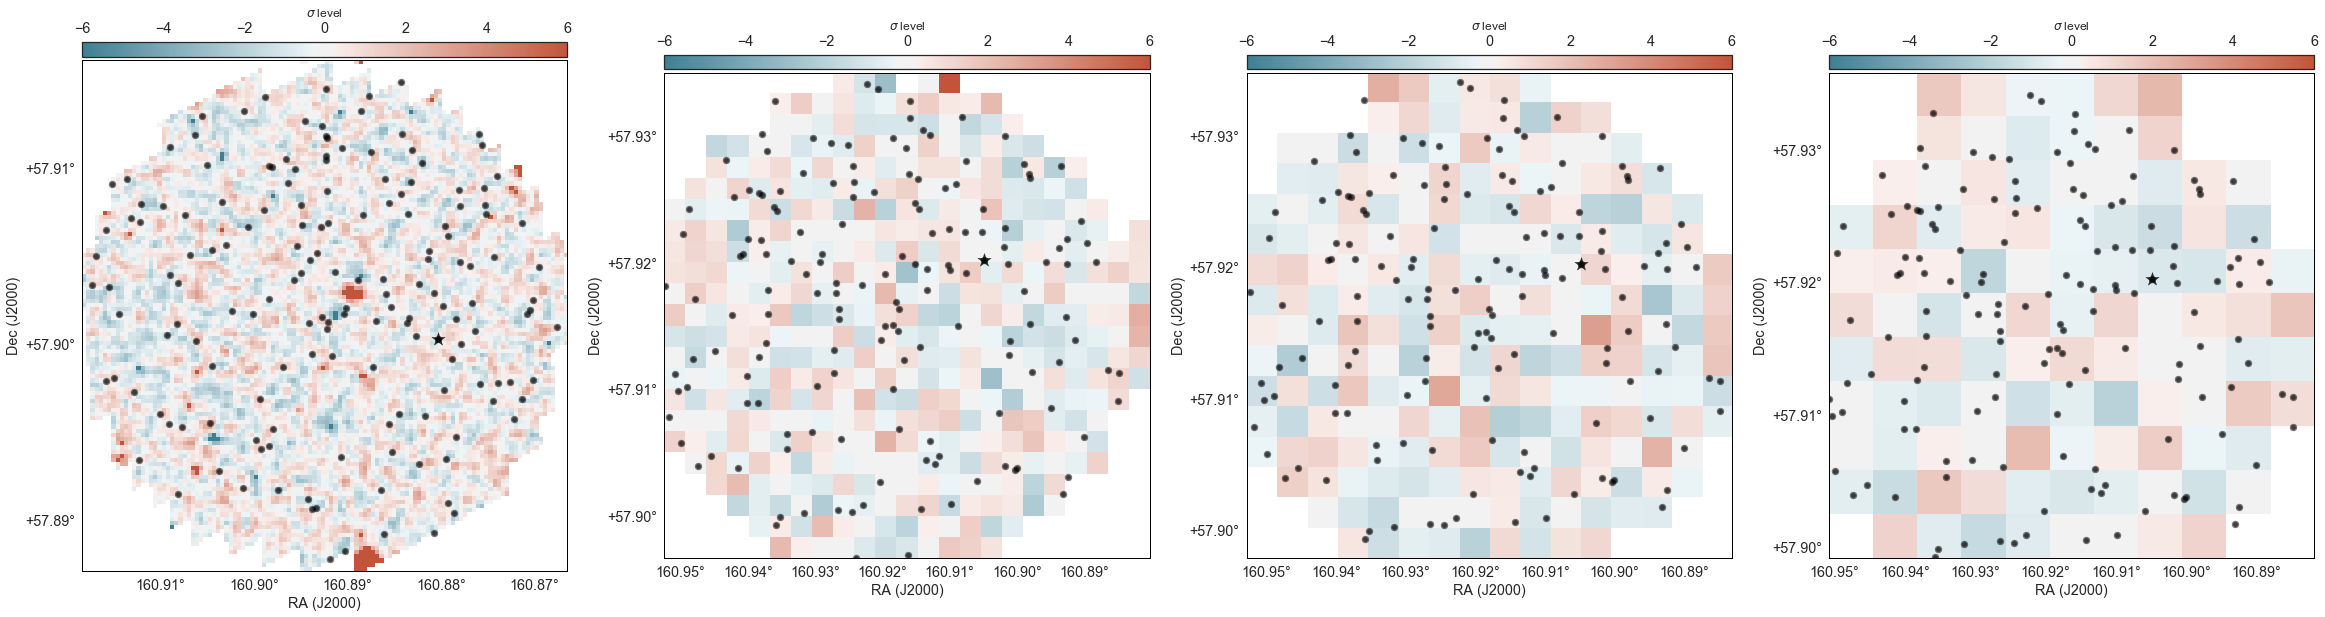

In [7]:
bayes_map=plots.plot_Bayes_pval_map(priors, posterior)

for i in range(0,4):
    bayes_map[0][i].colorbar.set_axis_label_text('$\sigma$ level')
    bayes_map[0][i].set_tick_labels_font(size='large')
    bayes_map[0][i].axis_labels.set_font(size='large')
    bayes_map[0][i].colorbar.set_font(size='large')
    bayes_map[0][i].show_markers(priors[0].sra, priors[0].sdec, edgecolor='black', facecolor='black',
                marker='o', s=50, alpha=0.5)
    bayes_map[0][i].show_markers(priors[0].sra[[68]], priors[0].sdec[[68]], edgecolor='black', facecolor='black',
                marker='*', s=200, alpha=0.8)

## 2D marginalised plot for fluxes

### Choose which source we want to look at


In [8]:
#array([ 22,  28, 108, 110, 117, 120])
# 23, 108, 110, 117]
# 0,   2,  11,  18,  24,  26,  30,  36,  38,  54,  69, 107
s1=83
priors[0].ID[s1]

'HELP_J104340.827+575449.741'

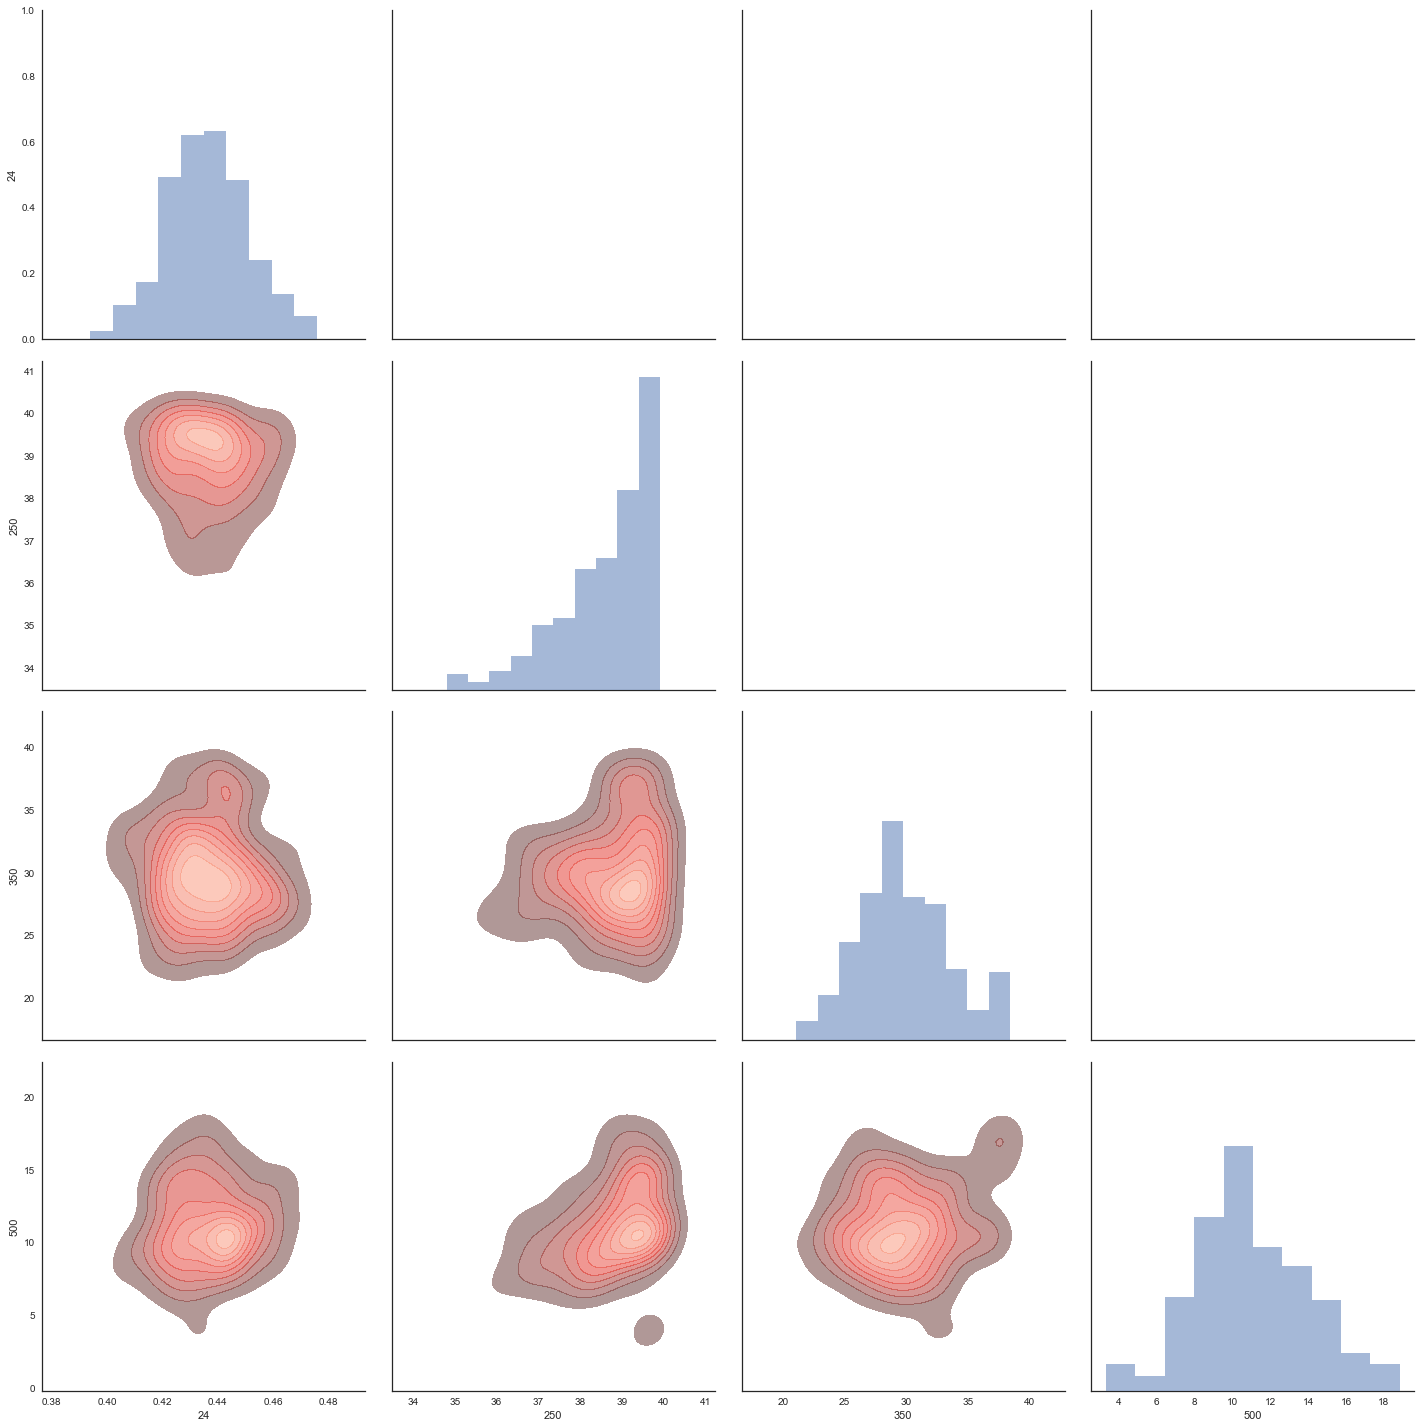

In [9]:
df = pd.DataFrame(posterior.samples['src_f'][:,:,s1],columns=[ '24','250', '350', '500'])
g = sns.PairGrid(df,size=5)
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Reds_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)


## Plot Posterior SED fit samples

In [10]:
from xidplus import sed
SEDs,fullSED =sed.berta_templates(PACS=False)

[24.0, 250.0, 350.0, 500.0]


In [11]:
temps=[15,20,21,9,30,1,5,14,0]
SEDs=SEDs[temps,:,:]
t=[x+1 for x in temps]
t.insert(0,0)
fullSED=fullSED[fullSED.columns[t]]

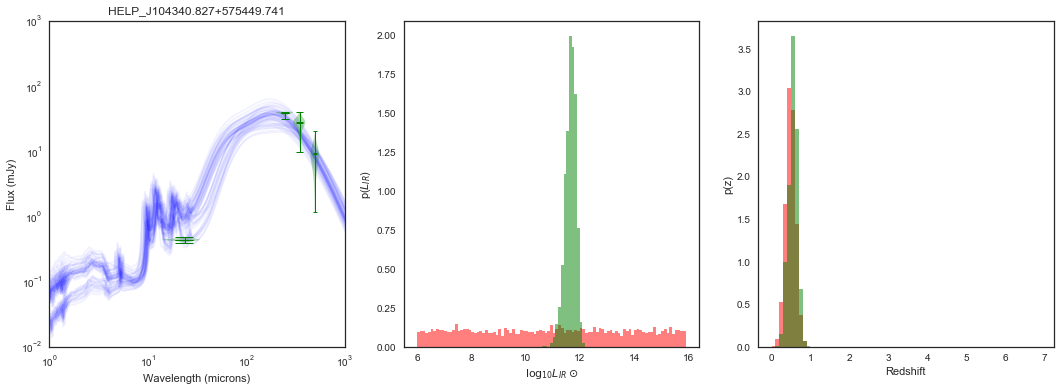

In [12]:
sns.set_style("white")

plt.figure(figsize=(18,6))
from astropy.cosmology import Planck13
plt.subplot(1,3,1)
violin_parts=plt.violinplot(posterior.samples['src_f'][:,1:4,s1],[250,350,500], points=60, widths=100,
                      showmeans=True, showextrema=True, showmedians=True,bw_method=0.5)
# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('green')
    vp.set_linewidth(1)

for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

violin_parts=plt.violinplot(posterior.samples['src_f'][:,0,s1],[24], points=60, widths=20,showmeans=True, showextrema=True, showmedians=True,bw_method=0.5)
# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('green')
    vp.set_linewidth(1)

for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

import astropy.units as u

for s in range(0,50,1):
    z= posterior.samples['z'][s,s1]
    div=(4.0*np.pi * np.square(Planck13.luminosity_distance(z).cgs))
    div=div.value
    plt.loglog((z+1.0)*fullSED['wave'],np.power(10.0,posterior.samples['Nbb'][s,s1])*(1.0+z)*fullSED[fullSED.columns[np.arange(1,posterior.samples['p'].shape[2]+1)
                                        [np.random.multinomial(1, posterior.samples['p'][s,s1,:])==1]]]/div,alpha=0.05,c='b',zorder=0)
    
    #plt.plot([250,350,500, 24,100,160],posterior_IR.samples['src_f'][s,0:6,s1], 'ko', alpha=0.1, ms=10)
    #plt.plot([250,350,500],posterior.samples['src_f'][s,0:3,s1], 'ro', alpha=0.1, ms=10)
    


plt.ylim(1E-2,1E3)
plt.xlim(1,1000)
#plt.plot([3.6,4.5,5.7],[31.58E-3,41.72E-3,25.5E-3], 'ro')
#plt.plot([3.6,4.5,5.7,7.9],[31.58E-3,41.72E-3,25.5E-3,0.001], 'ro')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (mJy)')
plt.title(priors[0].ID[s1])

plt.subplot(1,3,2)
plt.hist(np.random.uniform(6,16,size=5000),bins=np.arange(6,16,0.1),normed=True,color='red', alpha=0.5);
plt.hist(posterior.samples['Nbb'][:,s1], bins=np.arange(6,16,0.1),normed=True, alpha=0.5,color='green');
plt.xlabel(r'$\log_{10}L_{IR}\odot$')
plt.ylabel(r'p($L_{IR}$)')

plt.subplot(1,3,3)
plt.hist(np.random.normal(priors[0].z_median[s1],priors[0].z_sig[s1],size=5000),bins=np.arange(0,7,0.1),normed=True,color='red', alpha=0.5);
plt.hist(posterior.samples['z'][:,s1],bins=np.arange(0,7, 0.1),normed=True, alpha=0.5, color='green');
plt.xlabel('Redshift')
plt.ylabel('p(z)')

## Plot Table of probabilities for SED type

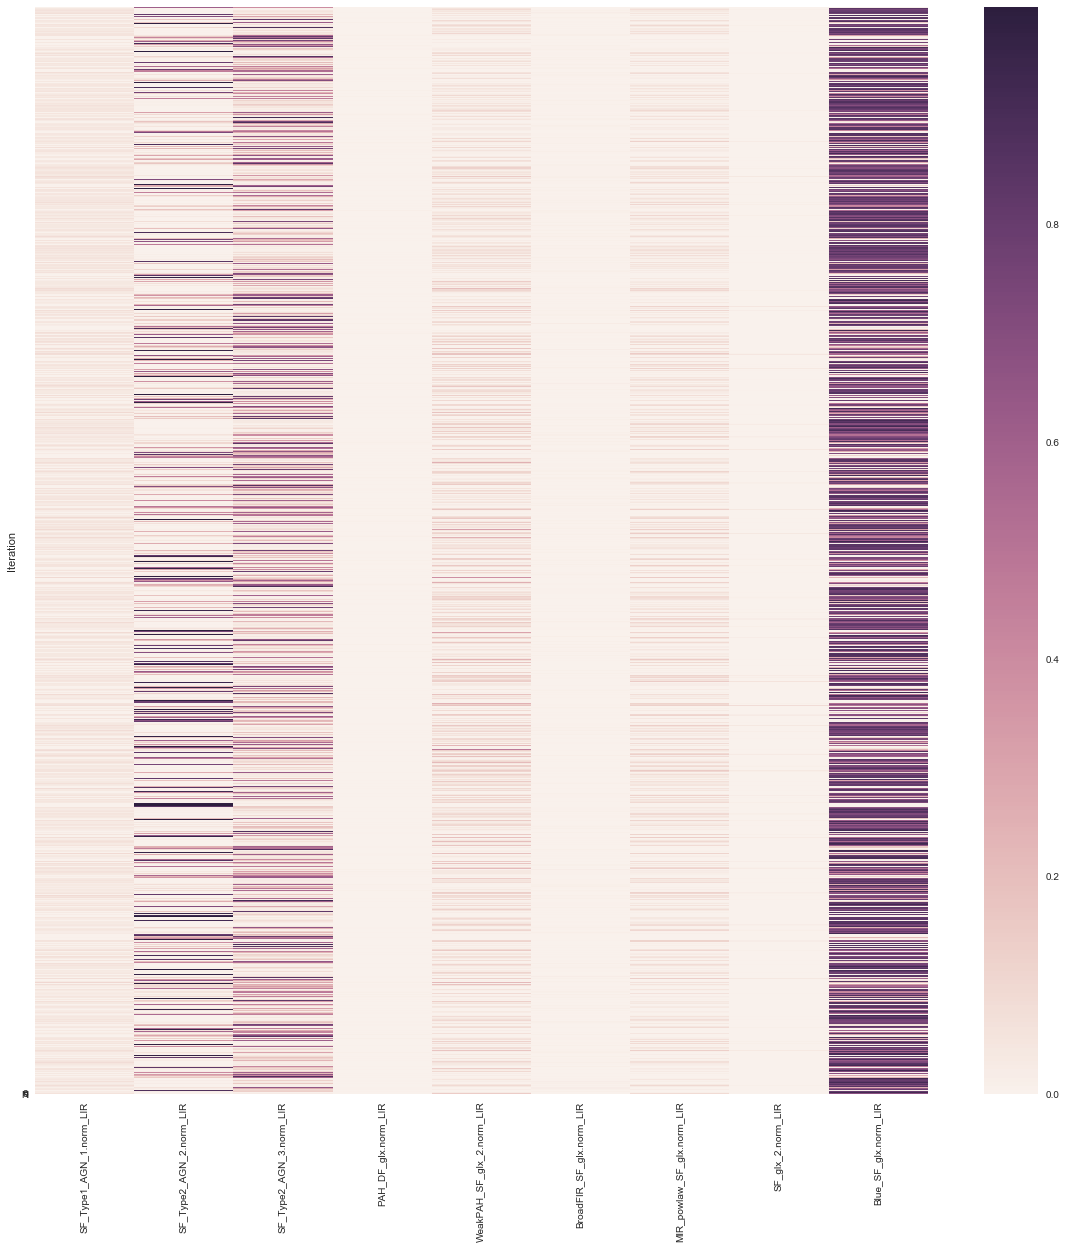

In [13]:
df=pd.DataFrame(posterior.samples['p'][:,s1,:],columns=fullSED.columns.tolist()[1:])
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df,annot=False, ax=ax)
ax.set_yticklabels('None')
ax.set_ylabel('Iteration')

## Plot Marginalised LIR

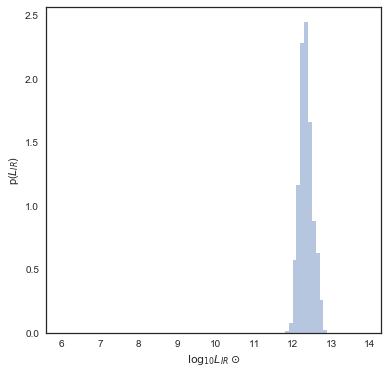

In [17]:
plt.figure(figsize=(6,6))
plt.hist(posterior.samples['Nbb'][:,s1], bins=np.arange(6,14,0.1),normed=True, alpha=0.4);
plt.xlabel(r'$\log_{10}L_{IR}\odot$')
plt.ylabel(r'p($L_{IR}$)')

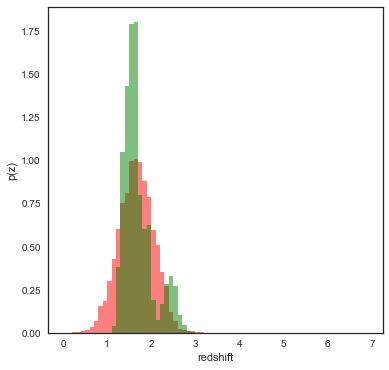

In [18]:
plt.figure(figsize=(6,6))
plt.hist(np.random.normal(priors[0].z_median[s1],priors[0].z_sig[s1],size=5000),bins=np.arange(0,7,0.1),normed=True,color='red', alpha=0.5);
plt.hist(posterior.samples['z'][250:,s1],bins=np.arange(0,7, 0.1),normed=True, alpha=0.5, color='green');
plt.xlabel('redshift')
plt.ylabel('p(z)')

## Appendix:
### Examining chains
To check runs look sensible,we can look at the samples and see if there is any drastic change between each chain. The chains are concatenated, so plotting the sample for any parameter on its own will cycle through each chain.

In [18]:
posterior.Rhat

{'Nbb': array([  2.01012702,   2.07497902,   1.96271373,   1.92124392,
          1.18380387,   2.42133708,   1.24962757,   1.18021322,
          1.11262157,   1.40367858,   1.12169811,   1.70318349,
          1.65914892,   1.99164288,   2.11248885,   2.00466985,
          2.30250432,   1.84587668,   1.67639186,   1.61627942,
          1.82392934,   1.21977942,   1.06360005,   1.22042272,
          1.51802191,   2.29207604,  11.47664711,   6.87167731,
          1.61473361,   2.81304448,   1.39972547,   5.47530628,
          1.82815785,   2.33079771,   1.21265622,   1.39143763,
          1.7904725 ,   1.67518901,   1.37451639,   1.34239135,
          1.05189731,   1.73266722,   1.76741624,   1.41555382,
          1.78990528,   2.27292025,   1.44275687,   1.93198627,
          1.19517615,   1.15226635,   1.09864141,   1.52817055,
          1.2158866 ,   1.80494936,   4.28523403,   2.71590541,
          2.64514766,   1.12203754,   3.1953153 ,   2.08365132,
          2.1635409 ,   1.4228265

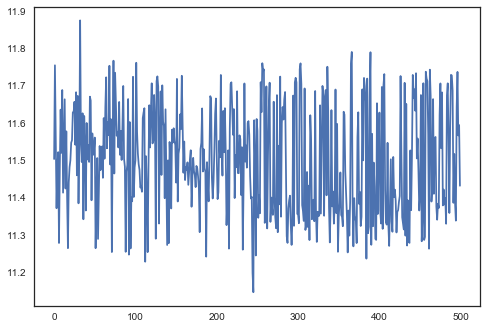

In [16]:
plt.plot(posterior.samples['Nbb'][:,83])

(array([ 13619.,  14175.,  16260.,  17110.,  17640.,  32671.,  28240.,
         12012.,   1562.,    461.]),
 array([  6.00032205,   6.86698212,   7.73364219,   8.60030226,
          9.46696233,  10.33362239,  11.20028246,  12.06694253,
         12.9336026 ,  13.80026267,  14.66692273]),
 <a list of 10 Patch objects>)

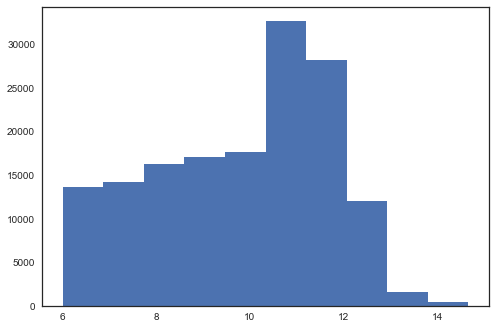

In [27]:
plt.hist(posterior.samples['Nbb'][250:,:].flatten())

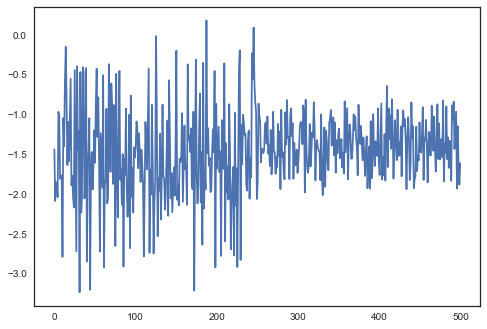

In [17]:
plt.plot(posterior.samples['bkg'][:,3])

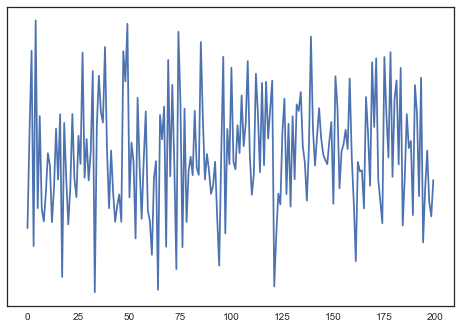

In [164]:
plt.semilogy(np.abs(posterior.samples['lp__']))

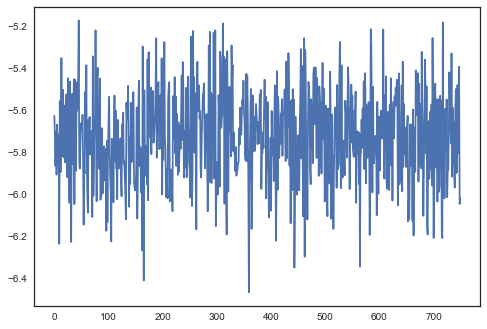

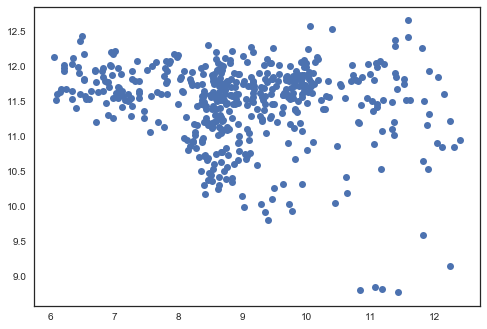

In [27]:
plt.plot(posterior.samples['Nbb'][:,6],posterior.samples['Nbb'][:,1],'o')

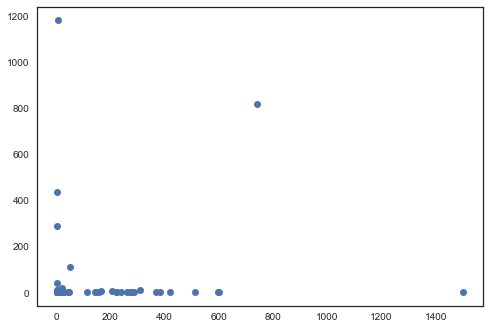

In [56]:
plt.plot(posterior.n_eff['Nbb'],posterior.n_eff['z'],'o')

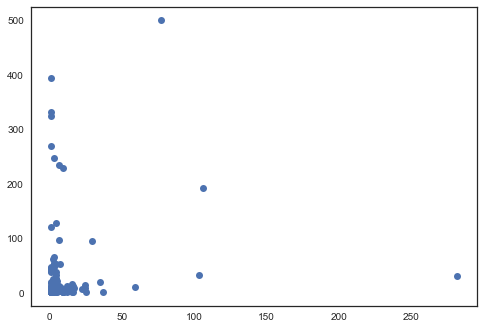

In [38]:
plt.plot(posterior.n_eff['z'],posterior.n_eff['src_f'][:,3],'o')

## Bayesian P value map for SEDs

In [29]:
b=1

mod_map_array[b][:,i]= ymod_map(prior,src_f).reshape(-1)
                                       +0
                                       +np.random.normal(scale=np.sqrt(prior.snim**2))

IndentationError: unexpected indent (<ipython-input-29-2d44c3231a86>, line 4)

In [38]:
red = np.arange(0, 8, 0.01)

In [34]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [35]:
find_nearest(red,3)

NameError: name 'red' is not defined

In [56]:
s=1
s1=72

def replicated_map(prior,posterior,SEDs,nrep=1000):
    from xidplus import posterior_maps
    mod_map=np.empty((prior.snpix,nrep))
    for s in range(0,nrep):
        src_f=np.empty((prior.nsrc))
        for i in range(0,prior.nsrc):
            src_f[i]=np.power(10.0,posterior.samples['Nbb'][s,i])*SEDs[np.random.multinomial(1, posterior.samples['p'][s,i,:])==1,2
                                                                        ,find_nearest(red,posterior.samples['z'][s,i])]
        mod_map[:,s]= posterior_maps.ymod_map(prior,src_f).reshape(-1)+0+np.random.normal(scale=np.sqrt(prior.snim**2))
    return mod_map


def replicated_map_plot(priors,posterior,SEDs):
    cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

    figs,fig=plots.plot_map(priors)
    mod_map=replicated_map(priors[0],posterior,SEDs,nrep=10)
    b=0
    figs[b]._data[priors[b].sy_pix-np.min(priors[b].sy_pix)-1,priors[b].sx_pix-np.min(priors[b].sx_pix)-1]=mod_map[:,2]
    figs[b].show_colorscale(vmin=np.min(priors[b].sim),vmax=np.max(priors[b].sim)+0.5,cmap=cmap)

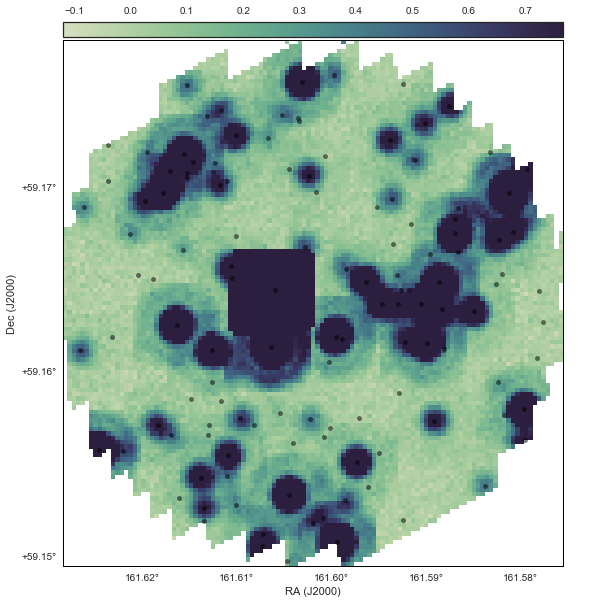

In [57]:
replicated_map_plot([priors[0]],posterior,SEDs)

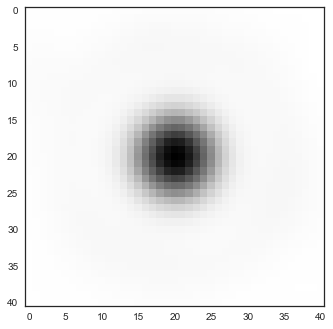

In [30]:
plt.imshow(priors[0].prf)

## Things to do:
1. Bayesian Pvalue map from SEDs
2. Add other source

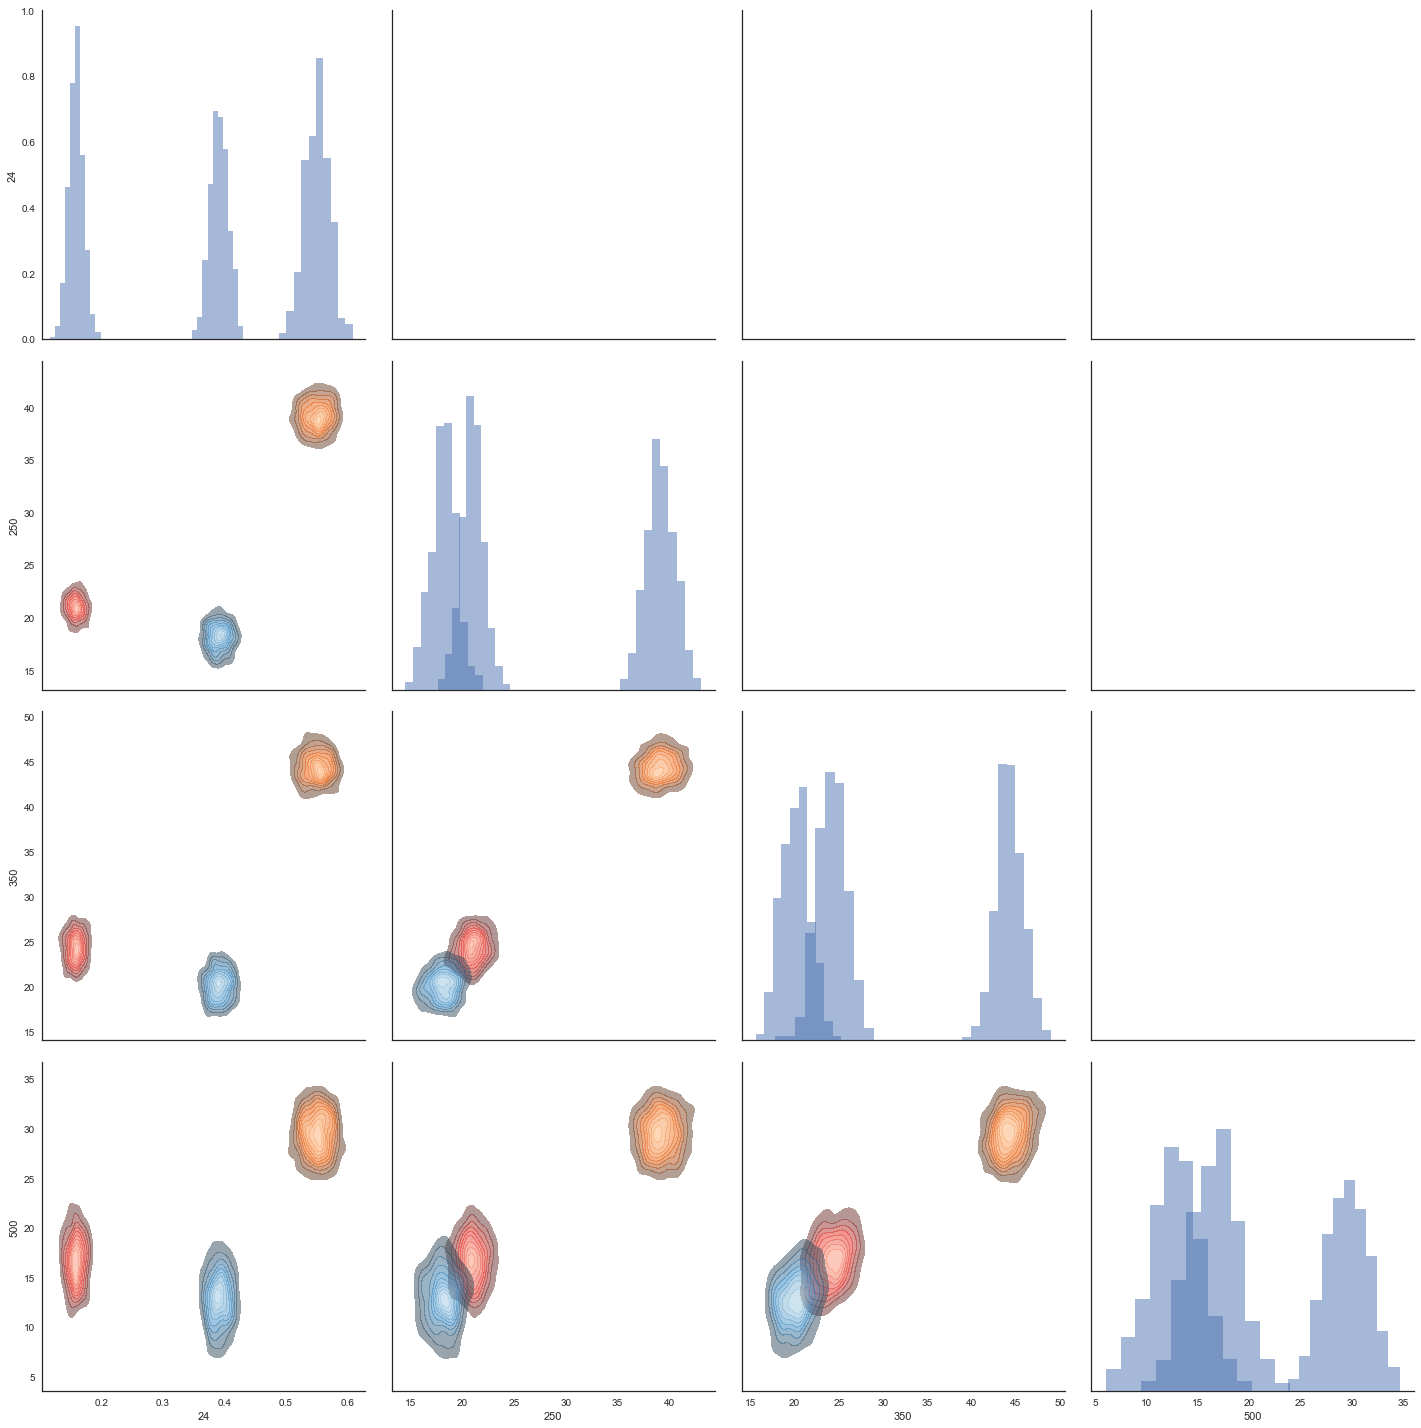

In [39]:

s1=72
s2=126
s3=99
df = pd.DataFrame(posterior.samples['src_f'][:,:,s1],columns=[ '24','250', '350', '500'])
g = sns.PairGrid(df,size=5)
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Reds_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)

df = pd.DataFrame(posterior.samples['src_f'][:,:,s2],columns=[ '24','250', '350', '500'])
g.data=df
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Blues_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)


df = pd.DataFrame(posterior.samples['src_f'][:,:,s1]+posterior.samples['src_f'][:,:,s2],columns=[ '24','250', '350', '500'])
g.data=df
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Oranges_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)


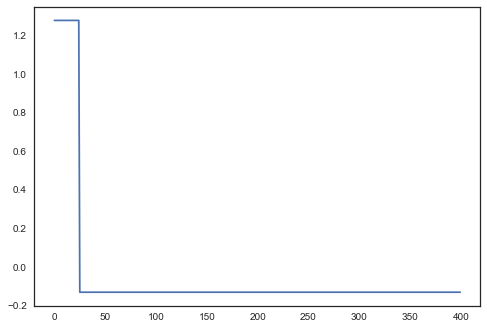

In [30]:
plt.plot(posterior.samples['bkg'][350:,1])

### Make FITS image from replicated maps

In [22]:

from xidplus import posterior_maps as postmaps
mod_map_array=postmaps.replicated_maps(priors,posterior,nrep=1500)


In [23]:
from photutils import DAOStarFinder
fwhm=[2,17.6,23.9,35.2]
tmp_fits=postmaps.make_fits_image(priors[1],priors[1].sim)
daofind = DAOStarFinder(fwhm=fwhm[1]/np.abs(tmp_fits[1].header['CD1_1']*3600.0), threshold=1)    
s250 = daofind(tmp_fits[1].data)
print(s250)
tmp_fits=postmaps.make_fits_image(priors[2],priors[2].sim)
daofind = DAOStarFinder(fwhm=fwhm[2]/np.abs(tmp_fits[1].header['CD1_1']*3600.0), threshold=1)    
s350 = daofind(tmp_fits[1].data)
print(s350)
tmp_fits=postmaps.make_fits_image(priors[3],priors[3].sim)
daofind = DAOStarFinder(fwhm=fwhm[3]/np.abs(tmp_fits[1].header['CD1_1']*3600.0), threshold=1)    
s500 = daofind(tmp_fits[1].data)
print(s500)

 id   xcentroid     ycentroid   ...      peak          flux          mag      
--- ------------- ------------- ... ------------- ------------- --------------
  1 10.2634527358  9.1052840759 ... 20.3806514462 12.2704697227  -2.7221529704
  2  2.1477260587 11.1407367685 ... 13.5036637849 12.9632433577 -2.78178418519
 id   xcentroid     ycentroid   ...      peak          flux          mag      
--- ------------- ------------- ... ------------- ------------- --------------
  1 6.71985314541 6.00091138137 ... 32.6322400828 21.6579123458 -3.33904147924
  2 9.69966280309 10.1035861653 ... 15.1458101613 13.2797976702 -2.80797864553
 id   xcentroid     ycentroid   ...      peak          flux          mag      
--- ------------- ------------- ... ------------- ------------- --------------
  1 4.13421059073 4.22668532022 ... 27.0488362808 21.8108916631 -3.34668355143


In [24]:
s250=s250[0]
s350=s350[0]
s500=s500[0]
actual_source=[None,s250,s350,s500]

In [115]:
starfinder_fluxes=np.empty_like(posterior.samples['src_f'][:,:,0])
starfinder_fluxes[:,:]=-5
fwhm=[2,17.6,23.9,35.2]
for b in range(1,len(priors)):
    ii=0
    for s in range(0,posterior.samples['src_f'].shape[0]):
        tmp_fits=postmaps.make_fits_image(priors[b],mod_map_array[b][:,s])
        daofind = DAOStarFinder(fwhm=fwhm[b]/np.abs(tmp_fits[1].header['CD1_1']*3600.0), threshold=1) 
        sources = daofind(tmp_fits[1].data)   
        try:
            ind=np.argmin(np.sqrt((sources['xcentroid']-actual_source[b]['xcentroid'])**2+(sources['ycentroid']-actual_source[b]['ycentroid'])**2))
            starfinder_fluxes[s,b]=sources['peak'][ind]
        except ValueError:
            #print(b,s,ii)
            ii+=1
starfinder_fluxes[:,0]=posterior.samples['src_f'][:,0,68]-5


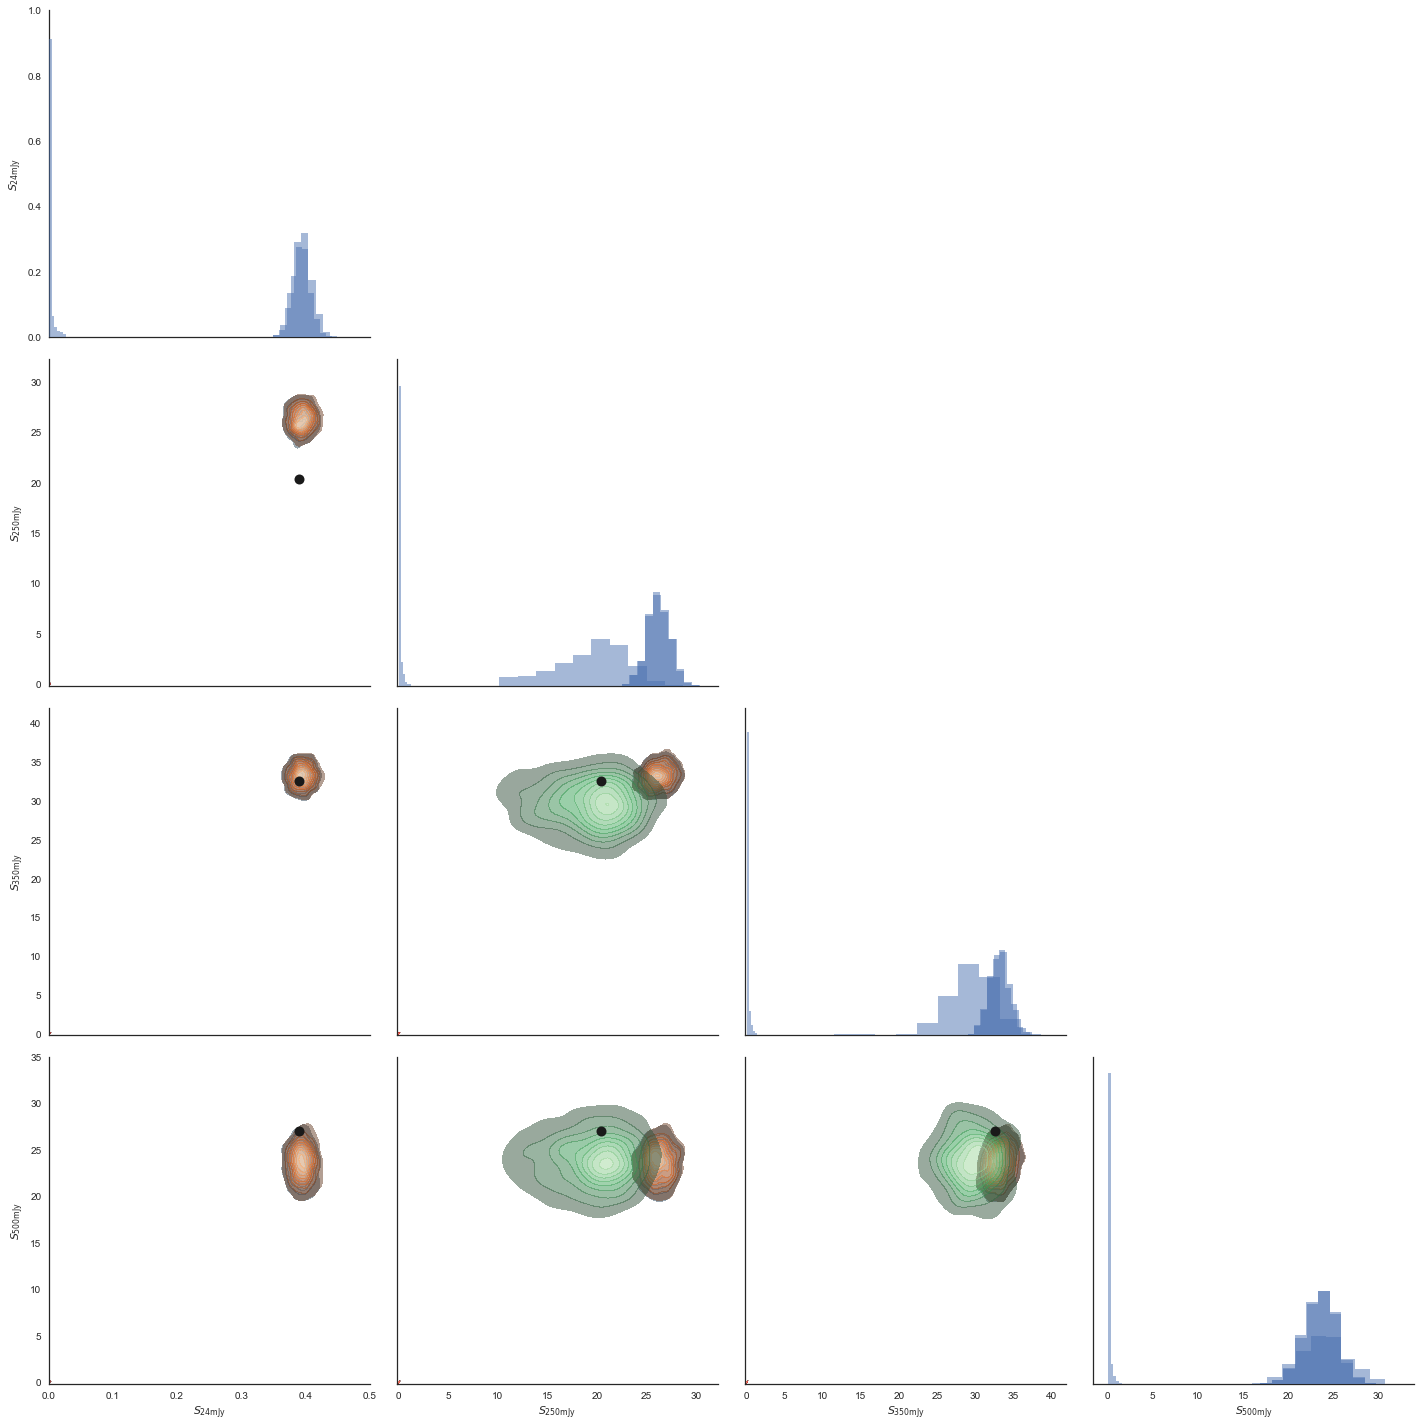

In [136]:
s1=73
s2=68
s3=99
sns.set_style("white")

df = pd.DataFrame(posterior.samples['src_f'][:,:,s1],columns=[ '$S_{24\mathrm{mJy}}$','$S_{250\mathrm{mJy}}$', '$S_{350\mathrm{mJy}}$', '$S_{500\mathrm{mJy}}$'])
g = sns.PairGrid(df,size=5)
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Reds_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)

df = pd.DataFrame(posterior.samples['src_f'][:,:,s2],columns=[ '$S_{24\mathrm{mJy}}$','$S_{250\mathrm{mJy}}$', '$S_{350\mathrm{mJy}}$', '$S_{500\mathrm{mJy}}$'])
g.data=df
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Blues_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)


df = pd.DataFrame(posterior.samples['src_f'][:,:,s1]+posterior.samples['src_f'][:,:,s2],columns=[ '$S_{24\mathrm{mJy}}$','$S_{250\mathrm{mJy}}$', '$S_{350\mathrm{mJy}}$', '$S_{500\mathrm{mJy}}$'])
g.data=df
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Oranges_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)

df = pd.DataFrame(starfinder_fluxes[(starfinder_fluxes[:,3]>10) & (starfinder_fluxes[:,2]>10) & (starfinder_fluxes[:,1]>10),:],columns=[ '$S_{24\mathrm{mJy}}$','$S_{250\mathrm{mJy}}$', '$S_{350\mathrm{mJy}}$', '$S_{500\mathrm{mJy}}$'])
g.data=df
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.kdeplot, cmap="Greens_d",alpha=0.5,n_levels=10,normed=True, shade=True,shade_lowest=False)
g.axes[1,0].plot(0.39,20.38,'ko',ms=10)
g.axes[2,0].plot(0.39,32.63,'ko',ms=10)
g.axes[3,0].plot(0.39,27.0,'ko',ms=10)

g.axes[2,1].plot(20.38,32.63,'ko',ms=10)
g.axes[3,1].plot(20.38,27.0,'ko',ms=10)

g.axes[3,2].plot(32.63,27.0,'ko',ms=10)
g.axes[0,1].set_axis_off()
g.axes[0,2].set_axis_off()
g.axes[0,3].set_axis_off()
g.axes[1,2].set_axis_off()
g.axes[1,3].set_axis_off()
g.axes[2,3].set_axis_off()

for i in (g.axes[:,0]):
    i.set_xlim(0,0.5)

In [20]:
posterior.div_params['Nbb'].shape

(4, 161)

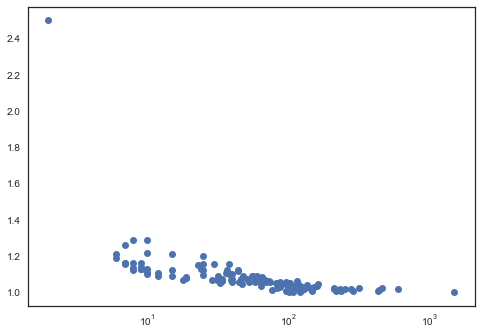

In [22]:
plt.semilogx(posterior.n_eff['Nbb'],posterior.Rhat['Nbb'],'o')

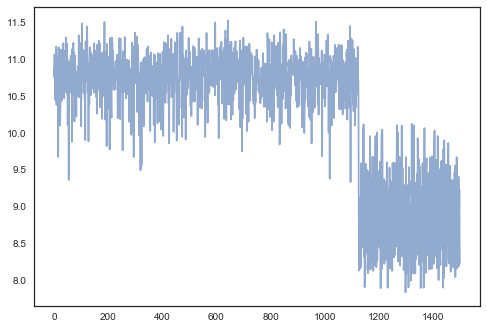

In [23]:
plt.plot(posterior.samples['Nbb'][:,posterior.Rhat['Nbb']>1.6],alpha=0.6)

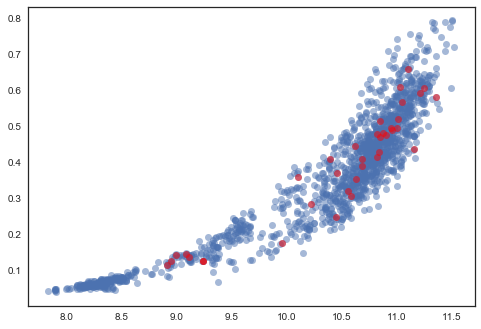

In [24]:
ind=posterior.Rhat['Nbb']>1.6
plt.plot(posterior.samples['Nbb'][:,ind].flatten(),posterior.samples['z'][:,ind].flatten(),'o',alpha=0.5)
plt.plot(posterior.div_params['Nbb'][:,ind].flatten(),posterior.div_params['z'][:,ind].flatten(),'ro',alpha=0.5)

In [32]:
posterior.samples['Nbb'][::10,:].flatten()

array([ 12.54621502,  11.47933798,   9.03065769, ...,  11.58004723,
         8.7857962 ,  11.7367161 ])

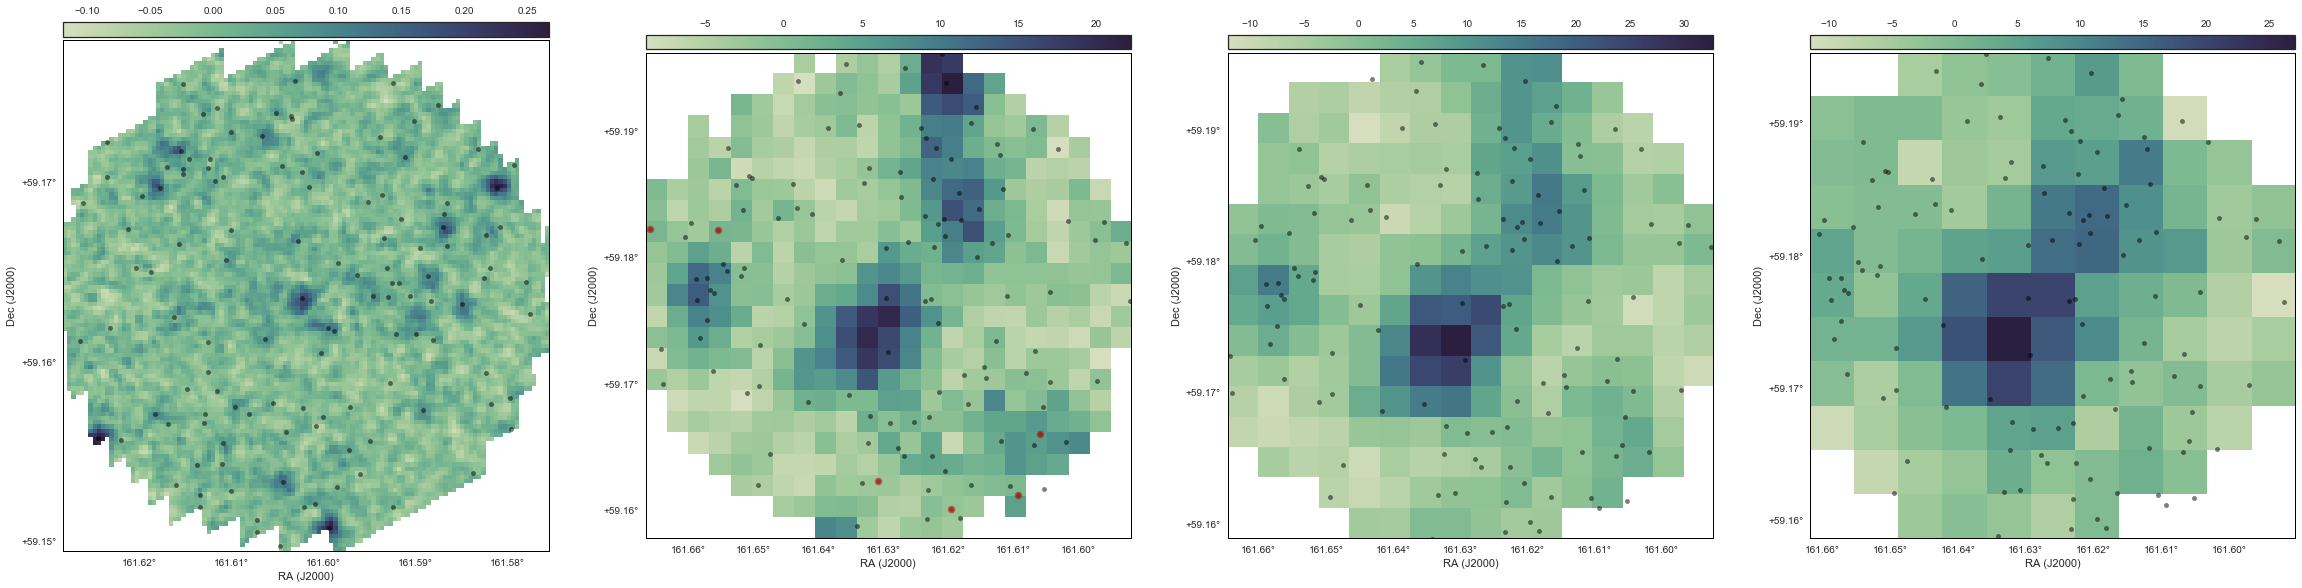

In [62]:
orig_map=plots.plot_map(priors);

orig_map[0][1].show_markers(priors[0].sra[ind], priors[0].sdec[ind], edgecolor='black', facecolor='red',marker='o', s=50, alpha=0.5)

In [63]:
np.arange(0,priors[0].sra.size)[ind]

array([ 22,  28, 108, 110, 117, 120])

In [68]:
dodge_samps=np.full((1500),fill_value=False)
for i in range(0,posterior.div_params['Nbb'].shape[0]):
    tmp=np.abs(posterior.samples['Nbb']-posterior.div_params['Nbb'][i,:])
    dodge_samps[tmp.sum(axis=1)==0.0]=True
    

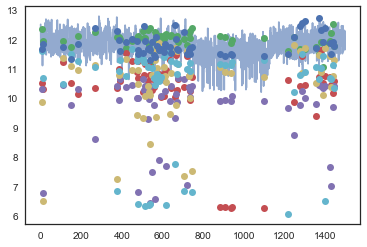

In [122]:
plt.plot(posterior.samples['Nbb'][:,posterior.Rhat['Nbb']>1.1][:,5],alpha=0.6)
plt.plot(np.arange(0,1500)[dodge_samps],posterior.samples['Nbb'][dodge_samps,:][:,posterior.Rhat['Nbb']>1.1],'o')

# Mean of divergent vs mean of non_divergent

### Nbb

(array([  3.,   3.,   5.,  22.,  53.,  53.,  15.,   3.,   1.,   3.]),
 array([-1.12473891, -0.89365761, -0.66257632, -0.43149502, -0.20041373,
         0.03066757,  0.26174887,  0.49283016,  0.72391146,  0.95499276,
         1.18607405]),
 <a list of 10 Patch objects>)

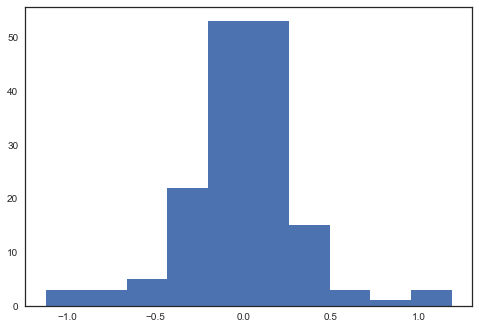

In [19]:
plt.hist(np.mean(posterior.nondiv_params['Nbb'],axis=0)-np.mean(posterior.div_params['Nbb'],axis=0))

In [13]:
diff=np.mean(posterior.nondiv_params['Nbb'],axis=0)-np.mean(posterior.div_params['Nbb'],axis=0)

In [149]:
diff[112]

-0.18109763221508501

In [14]:
ind=np.abs(diff)>0.5

In [15]:
np.arange(0,priors[0].nsrc)[ind]

array([ 2, 35, 51, 86, 90])

(array([  2.,   1.,   3.,  10.,  32.,  50.,  10.,   6.,   6.,   3.]),
 array([-0.36011298, -0.2921381 , -0.22416322, -0.15618834, -0.08821345,
        -0.02023857,  0.04773631,  0.11571119,  0.18368607,  0.25166096,
         0.31963584]),
 <a list of 10 Patch objects>)

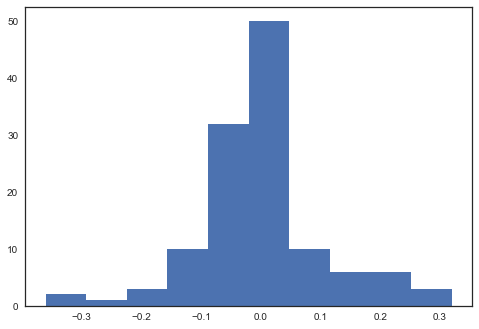

In [14]:
plt.hist(np.mean(posterior.nondiv_params['z'],axis=0)-np.mean(posterior.div_params['z'],axis=0))

(array([   7.,    6.,   14.,   51.,  339.,   41.,   14.,    8.,    9.,    3.]),
 array([-0.45860026, -0.35244066, -0.24628105, -0.14012145, -0.03396185,
         0.07219776,  0.17835736,  0.28451696,  0.39067656,  0.49683617,
         0.60299577]),
 <a list of 10 Patch objects>)

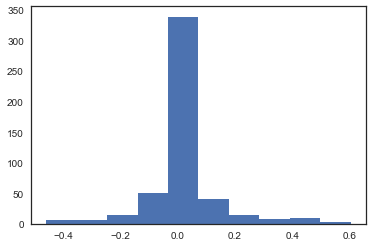

In [161]:
plt.hist(np.mean(posterior.div_params['src_f'],axis=0)-np.mean(posterior.nondiv_params['src_f'],axis=0))

In [162]:
diff_f=np.mean(posterior.div_params['src_f'],axis=0)-np.mean(posterior.nondiv_params['src_f'],axis=0)

In [163]:
ind=np.abs(diff_f)>0.4

In [165]:
np.arange(0,492)[ind]

array([148, 175, 196, 243, 298, 306, 314, 357, 366, 370, 432])

In [167]:
432/4

108.0

In [8]:
posterior.Rhat

{'Nbb': array([ 1.00754094,  1.12310537,  1.08235132,  1.00723291,  1.28838844,
         1.04157123,  1.12646002,  1.04804706,  1.01473556,  1.16059169,
         1.05934992,  1.21764031,  1.02360397,  1.08897979,  1.14707252,
         1.01151061,  1.05892476,  1.0377081 ,  1.05822247,  1.04138399,
         1.06628941,  1.05045995,  1.05823627,  1.10568844,  1.21087421,
         1.00301486,  1.12268812,  1.05808191,  1.10323905,  1.21198865,
         1.15688813,  1.08707107,  1.04927175,  1.14111385,  1.0871771 ,
         1.02157763,  1.03719462,  1.15574386,  2.49944253,  1.12090607,
         1.08640961,  1.06798146,  1.05060898,  1.02096281,  1.02031231,
         0.99997351,  1.0134737 ,  1.00367472,  1.07203688,  1.03575669,
         1.2615951 ,  1.12908959,  1.04098843,  1.12931412,  1.04385601,
         1.28624789,  1.0686458 ,  1.025252  ,  1.09122369,  1.05916235,
         1.07549992,  1.05827177,  1.16314111,  1.06170177,  1.05510923,
         1.05521348,  1.12840069,  1.1196396

## Difference Between SED and fluxes

In [9]:
s1=3
SEDs[np.random.multinomial(1, posterior.samples['p'][0,s1,:])==1,0,]

NameError: name 'SEDs' is not defined

In [10]:
find_nearest(red,3)

NameError: name 'find_nearest' is not defined

In [25]:
red = np.arange(0, 8, 0.01)
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [26]:
SED_post=np.empty_like(posterior.samples['src_f'])
for b in range(0,len(priors)):
    for s in range(0,priors[0].nsrc):
        for i in range(posterior.samples['Nbb'].shape[0]):
            SED_post[i,b,s]=np.power(10.0,posterior.samples['Nbb'][i,s])*SEDs[
                np.random.multinomial(1, posterior.samples['p'][i,s,:])==1,b,
                find_nearest(red,posterior.samples['z'][i,s])]

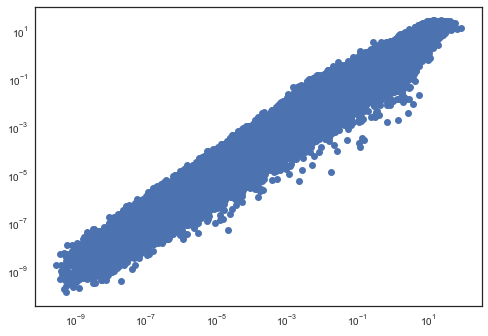

In [72]:
plt.loglog(SED_post[:,:,:].flatten(),posterior.samples['src_f'].flatten(),'o')

## Are the divergences occuring when away from SED templates??

In [91]:
SED_div=np.empty((posterior.div_params['src_f'].shape[0],len(priors),priors[0].nsrc))
for b in range(0,len(priors)):
    for s in range(0,priors[0].nsrc):
        for i in range(posterior.div_params['Nbb'].shape[0]):
            SED_div[i,b,s]=np.power(10.0,posterior.div_params['Nbb'][i,s])*SEDs[np.arange(0,len(temps))[np.random.multinomial(1, posterior.samples['p']
                                                                      [dodge_samps,s,:][i,:])==1],b,
                        find_nearest(red,posterior.div_params['z'][i,s])]

In [92]:
SED_nondiv=np.empty((posterior.nondiv_params['src_f'].shape[0],len(priors),priors[0].nsrc))
for b in range(0,len(priors)):
    for s in range(0,priors[0].nsrc):
        for i in range(posterior.nondiv_params['Nbb'].shape[0]):
            SED_nondiv[i,b,s]=np.power(10.0,posterior.nondiv_params['Nbb'][i,s])*SEDs[np.arange(0,len(temps))[np.random.multinomial(1, posterior.samples['p'][np.invert(dodge_samps),s,:][i,:])==1],b,
                                                                                   find_nearest(red,posterior.nondiv_params['z'][i,s])]

In [101]:
SED_diff_dodge=(SED_div-posterior.samples['src_f'][dodge_samps,:,:])/(0.3*SED_div)
SED_diff_good=(SED_nondiv-posterior.samples['src_f'][np.invert(dodge_samps),:,:])/(0.3*SED_nondiv)


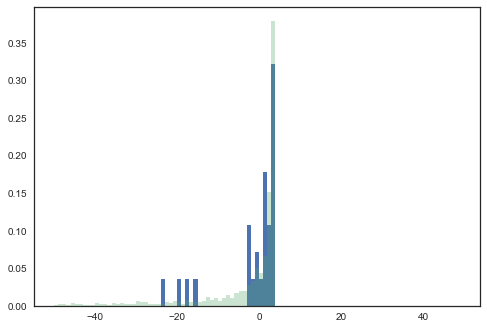

In [117]:
plt.hist(SED_diff_dodge[:,1,7],normed=True,bins=np.arange(-50,50));
plt.hist(SED_diff_good[:,1,7],alpha=0.3,normed=True,bins=np.arange(-50,50));

In [81]:
dodge_samps

1500

In [35]:
diff_SED=(SED_post[:,:,:]-posterior.samples['src_f'])/(0.3*SED_post[:,:,:])

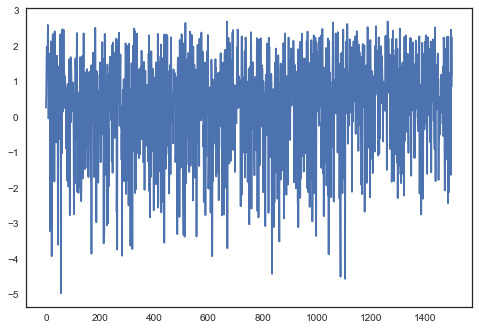

In [39]:
plt.plot(diff_SED[:,0,3])

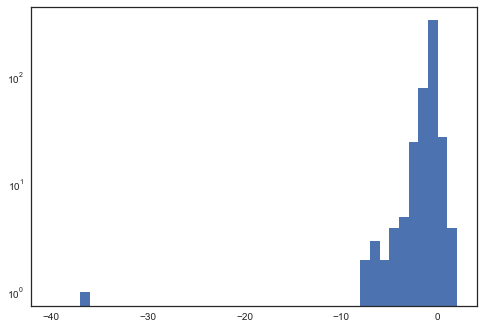

In [76]:
plt.hist(np.mean(diff_SED,axis=0).flatten(), bins=np.arange(-40,3),log=True);

In [69]:
ind_SED=np.mean(diff_SED,axis=0)<-10

In [70]:
np.arange(0,priors[0].nsrc)[ind_SED[0,:]]

array([0])

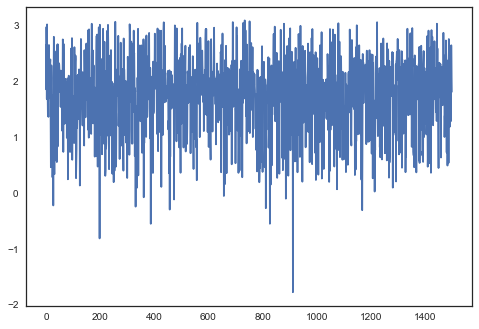

In [79]:
plt.plot(diff_SED[:,0,73])

In [80]:
np.mean(diff_SED[:,0,73])

1.7406024141427834

In [88]:
posterior.div_params['Nbb'].shape

(37, 123)

## Generate samples from the prior?

In [ ]:
from astropy import wcs


import numpy as np
import xidplus
from xidplus import moc_routines
import pickle

from xidplus import sed
import xidplus.stan_fit.SED as SPM
print(SEDs.shape)
fit=SPM.MIPS_SPIRE_gen(priors,SEDs,chains=2,iter=500,max_treedepth=12,seed=2911,adapt_delta=0.9)

(9, 4, 800)
/XID+MIPS_SPIRE_SED_gen not found or wrong version. Compiling


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_38cb667fd15c1fb081e5d16e984d6f8e NOW.


In [152]:
import xidplus.stan_fit.stan_utility as stan_utility
stan_utility.check_treedepth(fit)
stan_utility.check_energy(fit)
stan_utility.check_div(fit)

4 of 200 iterations saturated the maximum tree depth of 10 (2.0%)
Run again with max_depth set to a larger value to avoid saturation
9.0 of 200 iterations ended with a divergence (4.5%)
Try running with larger adapt_delta to remove the divergences


In [153]:
posterior=sed.posterior_sed(fit,priors,SEDs)

4 of 200 iterations saturated the maximum tree depth of 10 (2.0%)
Run again with max_depth set to a larger value to avoid saturation
9.0 of 200 iterations ended with a divergence (4.5%)
Try running with larger adapt_delta to remove the divergences


(-5.0, 5)